In [14]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import (
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV

In [2]:
X_train_pca = pd.read_csv(".\\DATA\\DataFrames\\X_train_pca.csv")

In [3]:
X_test_pca = pd.read_csv(".\\DATA\\DataFrames\\X_test_pca.csv")

In [4]:
y_train = pd.read_csv(".\\DATA\\DataFrames\\y_train_diagnosis.csv")
y_train = np.ravel(y_train)

In [5]:
y_test = pd.read_csv(".\\DATA\\DataFrames\\y_test_diagnosis.csv")
y_test = np.ravel(y_test)

In [22]:
svc = SVC(kernel = "rbf", random_state = 42)  # create svc instance

In [23]:
param_grid_svc = {
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 10, 100],
    "gamma": [0.0001, 0.0005, 0.001, 0.005]
}

In [24]:
grid_model = GridSearchCV(svc, param_grid_svc)
grid_model.fit(X_train_pca, y_train)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 10, 100],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [30]:
grid_model = grid_model.best_estimator_

In [31]:
predictions = grid_model.predict(X_test_pca)

In [32]:
print(classification_report(y_test, predictions))  # evaluation of first performance

              precision    recall  f1-score   support

       akiec       0.28      0.08      0.12        65
         bcc       0.39      0.62      0.48       103
         bkl       0.45      0.33      0.38       220
          df       0.00      0.00      0.00        23
         mel       0.46      0.32      0.38       223
          nv       0.64      0.81      0.72       585
        vasc       1.00      0.04      0.07        28

    accuracy                           0.55      1247
   macro avg       0.46      0.31      0.31      1247
weighted avg       0.53      0.55      0.52      1247


C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natal\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

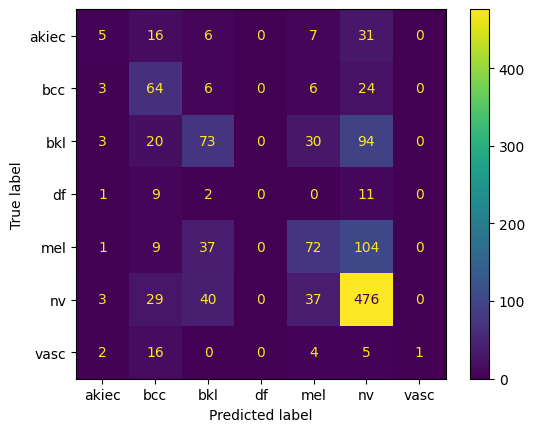

In [33]:
cm = confusion_matrix(y_test, predictions, labels=grid_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_model.classes_)
disp.plot();